In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [73]:
#customer data

customers = pd.DataFrame({
  "customer_id": [1,2,3,4,5,6,7,8,9,10],
  "customer_name": ["Ravi","Anita","Suresh","Meena","Amit","Kiran","Pooja","Rahul","Sneha","Vikram"],
  "region": ["South","North","South","East","West","South","North","West","East","South"],
  "join_date": pd.to_datetime([
      "2023-01-10","2023-02-15","2023-03-01","2023-01-25",
      "2023-04-10","2023-05-12","2023-06-01","2023-06-20",
      "2023-07-05","2023-08-15"
  ])
})

customers.to_csv("customer.csv",index=False)
customers



,customer_id,customer_name,region,join_date
0,1,Ravi,South,2023-01-10
1,2,Anita,North,2023-02-15
2,3,Suresh,South,2023-03-01
3,4,Meena,East,2023-01-25
4,5,Amit,West,2023-04-10
5,6,Kiran,South,2023-05-12
6,7,Pooja,North,2023-06-01
7,8,Rahul,West,2023-06-20
8,9,Sneha,East,2023-07-05
9,10,Vikram,South,2023-08-15


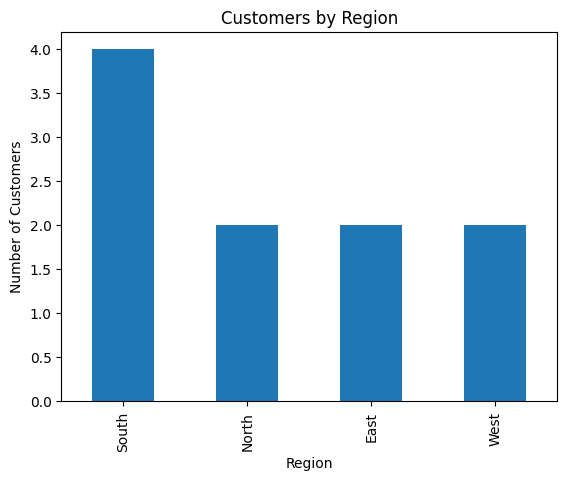

In [74]:
#visualization forcustomer data

import matplotlib.pyplot as plt

region_counts = customers['region'].value_counts()

region_counts.plot(kind='bar')
plt.title('Customers by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()


In [75]:
products = pd.DataFrame({
    "product_id": [101,102,103,104,105],
    "product_name": ["Laptop","Mobile","Headphones","Smart Watch","Tablet"],
    "category": ["Electronics","Electronics","Accesories","Wearables","Electronics"],
    "price": [60000,30000,2000,15000,25000]
})

products.to_csv("products.csv",index=False)
products

,product_id,product_name,category,price
0,101,Laptop,Electronics,60000
1,102,Mobile,Electronics,30000
2,103,Headphones,Accesories,2000
3,104,Smart Watch,Wearables,15000
4,105,Tablet,Electronics,25000


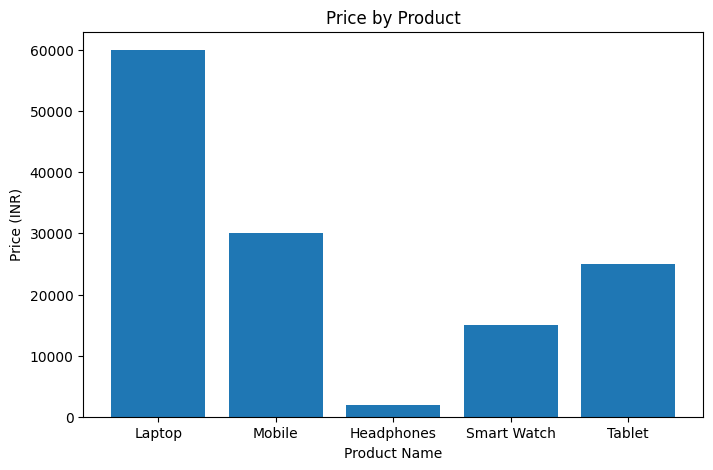

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# Bar chart (no label. no legend)
plt.bar(
        products['product_name'],
            products['price']
)

# Chart details
plt.title('Price by Product')
plt.xlabel('Product Name')
plt.ylabel('Price (INR)')

plt.show()



In [77]:
orders = pd.DataFrame({
    "order_id" : range(1001,1021),
    "product_id" : [101,102,103,104,105,101,102,103,104,105,
                     101,102,103,104,105,101,102,103,104,105],
    "customer_id": [1,2,3,4,5,1,2,6,7,8,9,10,3,4,5,6,7,8,9,10],
    "order_date" : pd.date_range(start="2023-06-01", periods=20, freq="7D"),
    "quantity": [1,2,3,1,2,1,1,3,2,1,1,2,1,3,2,1,2,1,1,1]
})


orders["sales"] = orders["quantity"] * orders["product_id"].map(
  dict(zip(products.product_id,products.price))
)

orders.to_csv("orders.csv", index=False)
orders

,order_id,product_id,customer_id,order_date,quantity,sales
0,1001,101,1,2023-06-01,1,60000
1,1002,102,2,2023-06-08,2,60000
2,1003,103,3,2023-06-15,3,6000
3,1004,104,4,2023-06-22,1,15000
4,1005,105,5,2023-06-29,2,50000
5,1006,101,1,2023-07-06,1,60000
6,1007,102,2,2023-07-13,1,30000
7,1008,103,6,2023-07-20,3,6000
8,1009,104,7,2023-07-27,2,30000
9,1010,105,8,2023-08-03,1,25000


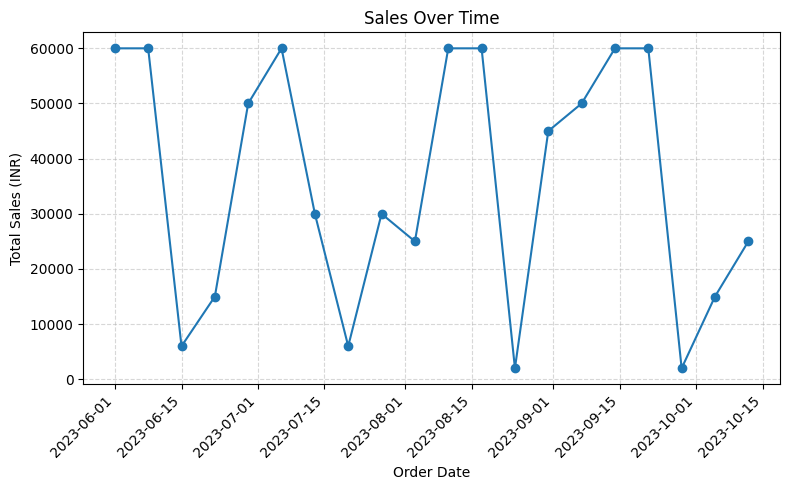

In [78]:
import matplotlib.pyplot as plt

# Group sales by order date
daily_sales = orders.groupby('order_date')['sales'].sum()

plt.figure(figsize=(8, 5))
plt.plot(daily_sales.index, daily_sales.values, marker='o')
plt.title('Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales (INR)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [79]:
import sqlite3

conn = sqlite3.connect("retail.db")


customers.to_sql("customers", conn, index=False, if_exists="replace")
products.to_sql("products", conn, index=False, if_exists="replace")
orders.to_sql("orders", conn, index=False, if_exists="replace")

20

In [80]:
 pd.read_sql("""
SELECT strftime('%Y-%m', order_date)AS month,
       SUM(sales)AS total_sales
FROM orders
GROUP BY month
ORDER BY month;
""",  conn)



,month,total_sales
0,2023-06,191000
1,2023-07,126000
2,2023-08,192000
3,2023-09,172000
4,2023-10,40000


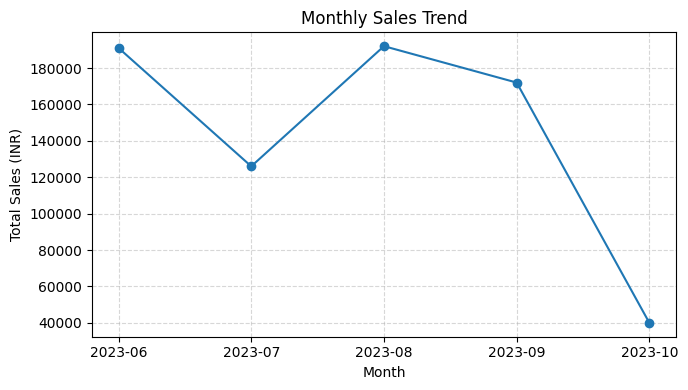

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))

plt.plot(
        monthly_sales['month'],
            monthly_sales['total_sales'],
            marker='o'
)

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales (INR)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [82]:


 pd.read_sql("""
SELECT p.product_name,
       SUM(o.sales) AS revenue
FROM orders o
JOIN products p ON o.product_id = p.product_id
GROUP BY p.product_name
ORDER BY revenue DESC;
""", conn)

,product_name,revenue
0,Laptop,240000
1,Mobile,210000
2,Tablet,150000
3,Smart Watch,105000
4,Headphones,16000


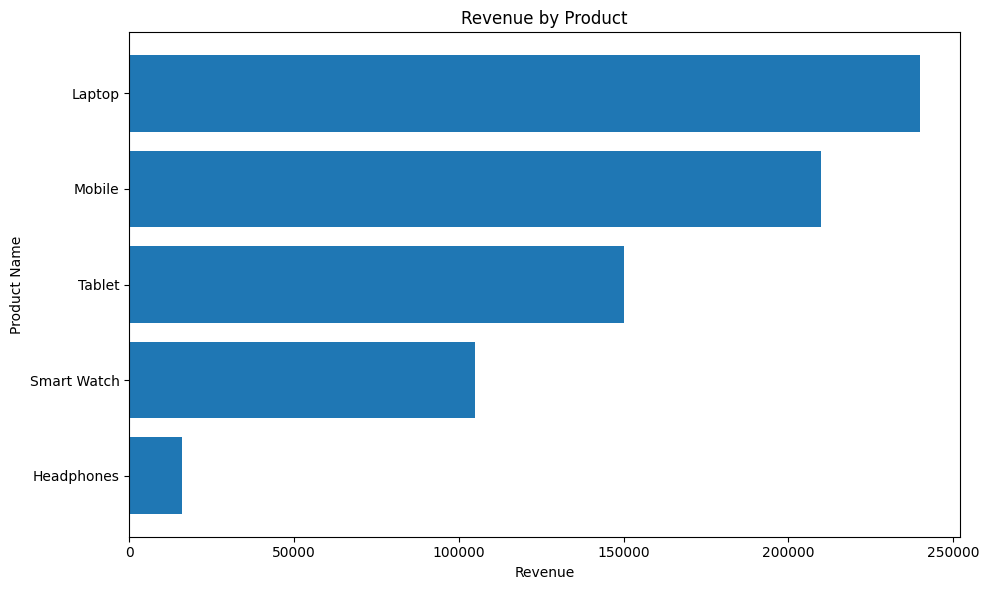

In [83]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.barh(df['product_name'], df['revenue'])
plt.xlabel('Revenue')
plt.ylabel('Product Name')
plt.title('Revenue by Product')

# Highest revenue on top
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()
